In [1]:
import os
import sys

global SRC
SRC = '/home/ubuntu/uncover-ml'
os.environ['UNCOVERML_SRC'] = SRC
sys.path.append(os.path.join(SRC, 'uncoverml'))

In [2]:
import os

from uncoverml import diagnostics


# Path to feature ranking scores file.
path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 
                    'precomputed', 'learn', 'sirsam_Na_randomforest_featureranks.json')

feature_ranks_figure = diagnostics.plot_feature_ranks(path)
    

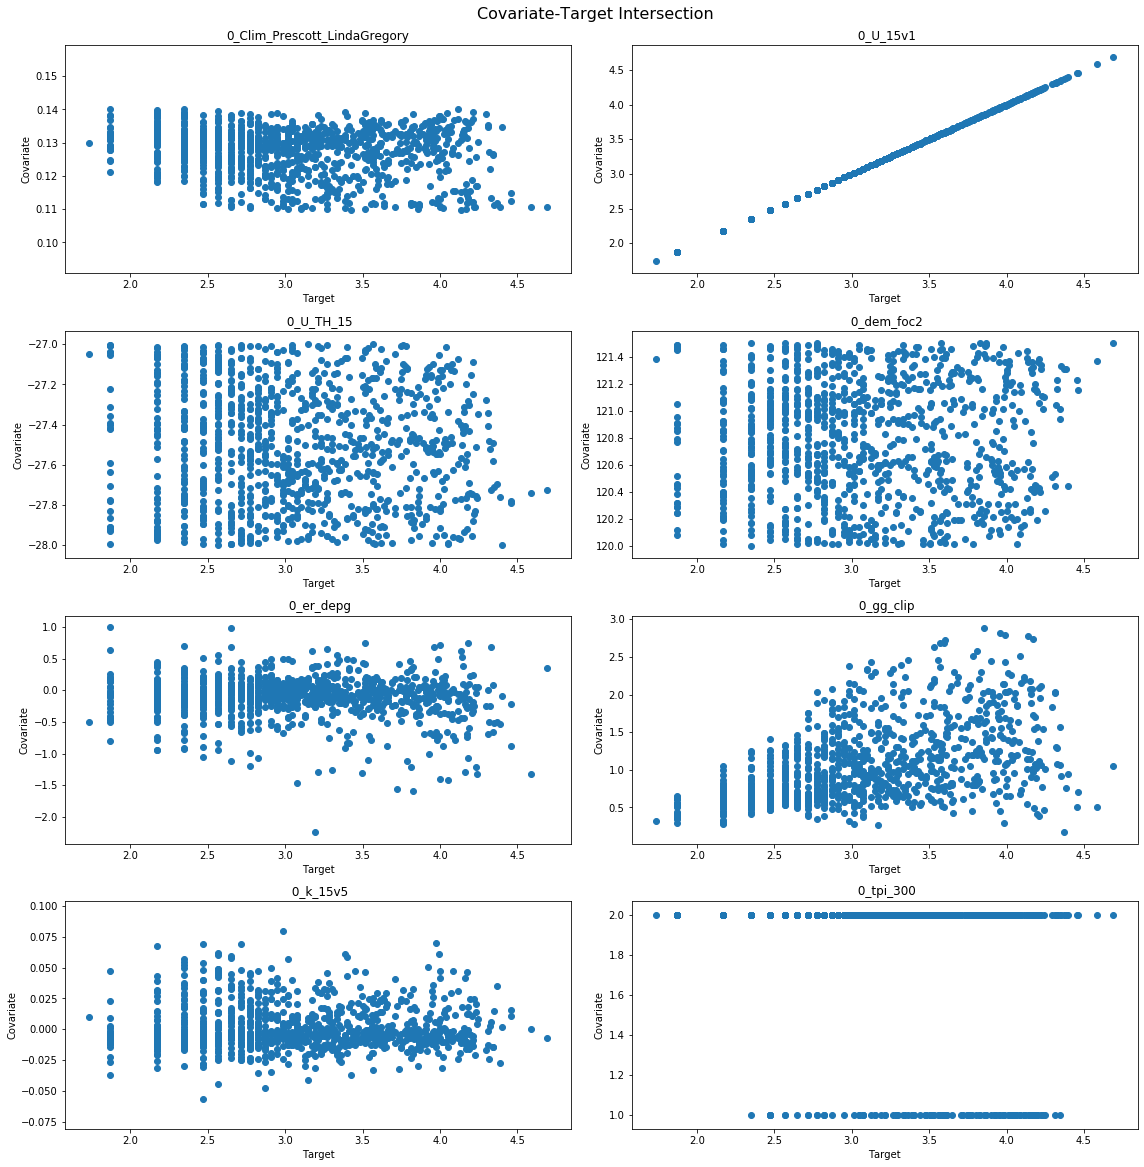

In [3]:
import os

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

intersection = diagnostics.plot_covariates_x_targets(path, cols=2)
    

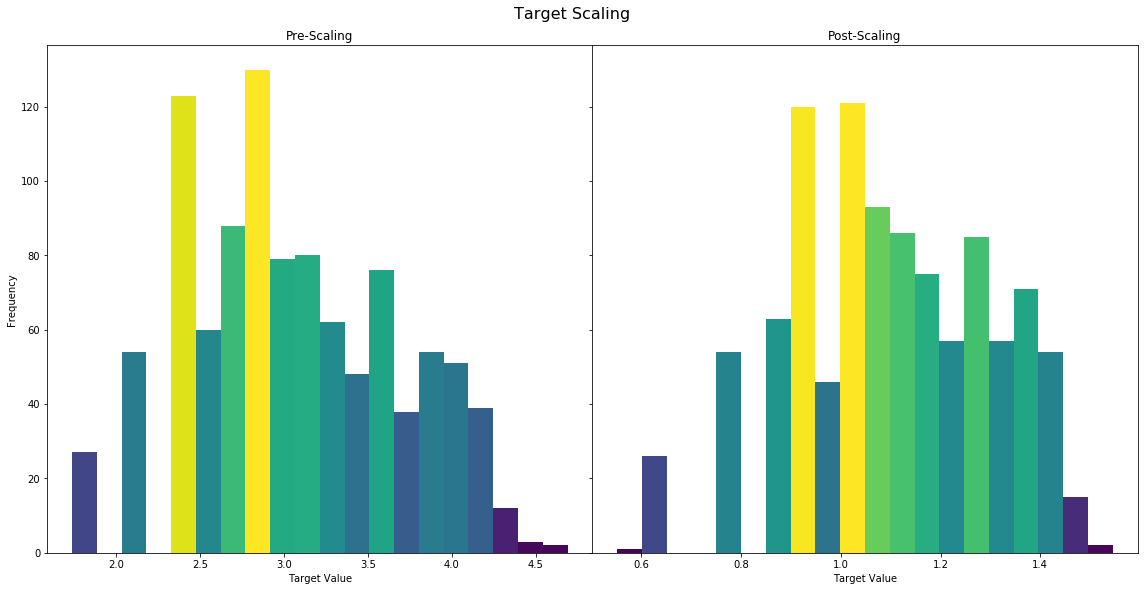

In [4]:
import os

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 'out',
                    'sirsam_Na_randomforest_transformed_targets.csv')

target_histograms = diagnostics.plot_target_scaling(path)


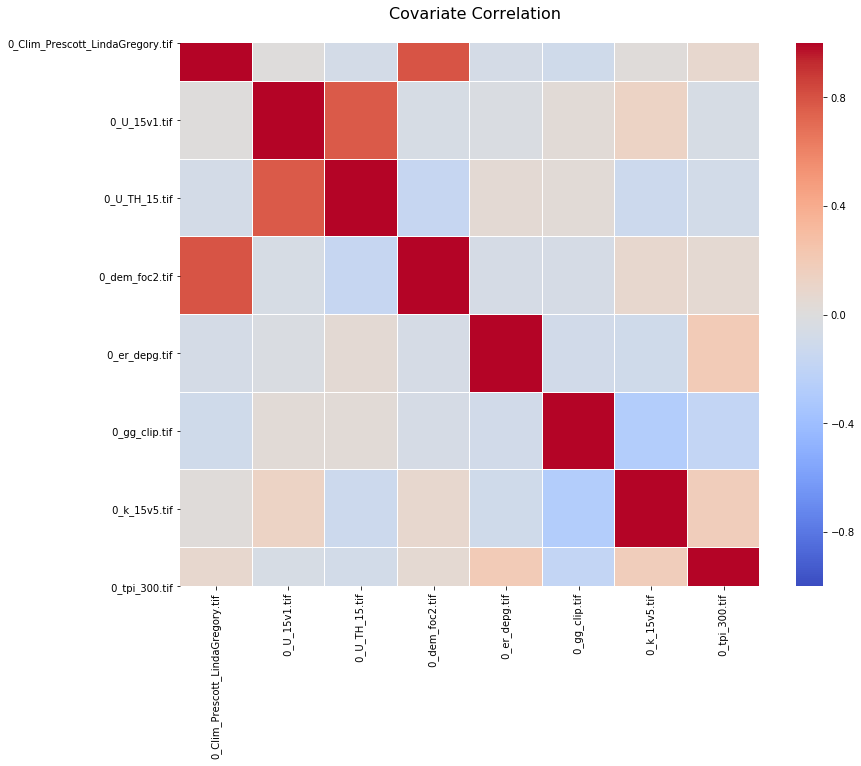

In [5]:
import os
import csv

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

correlation = diagnostics.plot_covariate_correlation(path)


{'adjusted_r2_score': 0.4977222426090007, 'adjusted_r2_score_transformed': 0.5012259724097133, 'expvar': 0.5234628450325468, 'expvar_transformed': 0.531611887457396, 'lins_ccc': 0.6782576696084297, 'lins_ccc_transformed': 0.6820184726717139, 'mll': 0.5554504342500338, 'mll_transformed': 0.8322164916070733, 'r2_score': 0.5174018081761803, 'r2_score_transformed': 0.5207674332235998, 'smse': 0.4825981918238197, 'smse_transformed': 0.47923256677640025}


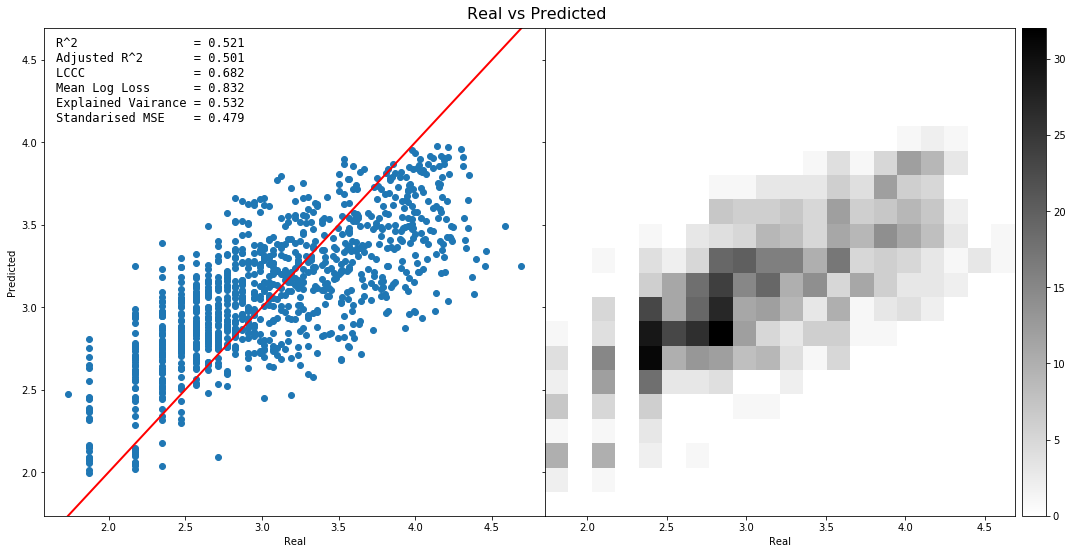

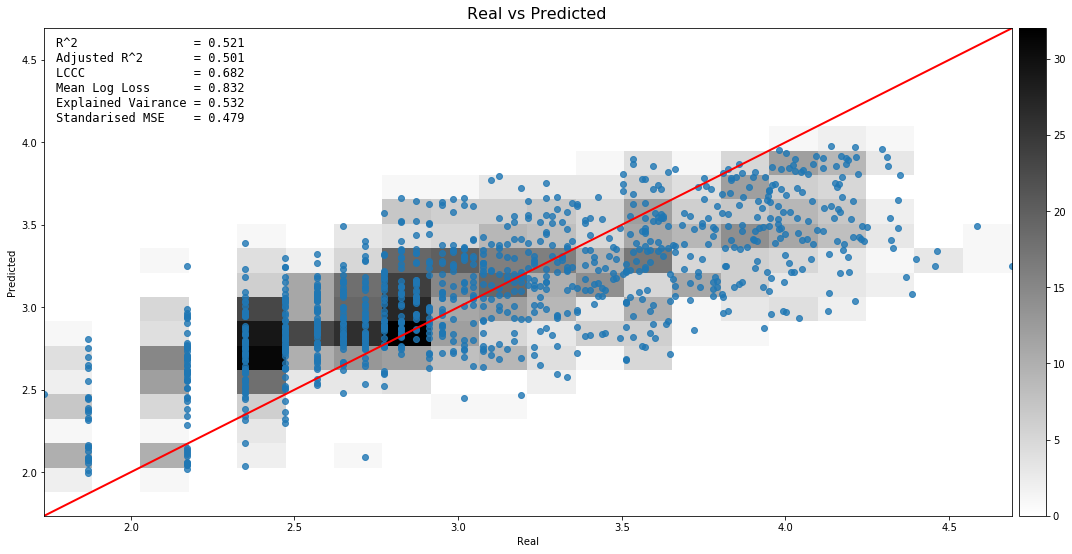

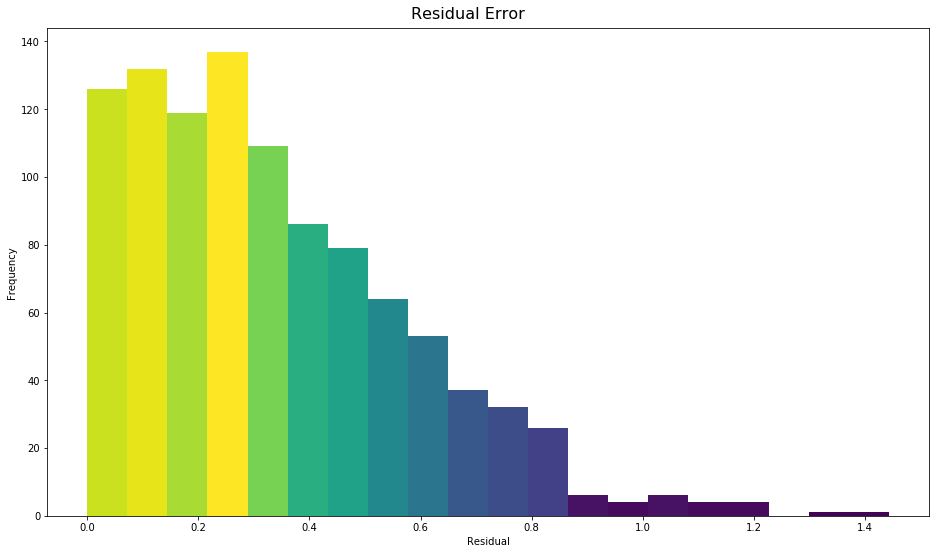

In [6]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

from uncoverml import diagnostics


rc_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_rawcovariates.csv')
pred_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_prediction.tif')
scores_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_crossval_scores.json')
with open(scores_path) as f:
    scores = json.load(f)
print(scores)

real_vs_pred = diagnostics.plot_real_vs_pred(rc_path, pred_path, scores_path=scores_path, overlay=False)
# real_vs_pred.text(0.05, 0.85, 'test\ntest\ntest')
real_vs_pred = diagnostics.plot_real_vs_pred(rc_path, pred_path, scores_path=scores_path, overlay=True)
residuals = diagnostics.plot_residual_error(rc_path, pred_path)

  

